# Decision Trees - Concepts and Theory

In [1]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
# Set up Notebook
%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style('white')

## Entropy

Entropy provides a statistical measurement of the information content in a data set. Another viewpoint is that entropy provides a measure of the unexpectedness of a data set, since data that are all the same have low entropy, and thus are easy to predict (or explain). The use of entropy in the context of machine learning follows its use in information theory, as developed by Claude Shannon, who quantified the concept of sharing information electronically. In this context, the entropy provided a means to quantify how much information was contained in a message, or how many bits it would take to communicate the message.

\begin{equation}
h = - \sum_{i = 1}^N P(x_i) \log_2(P(x_i))
\end{equation}


To demonstrate how to compute entropy, we will employ a hypothetical two class data set: success (**S**) and failure (**F**), with probabilities $P(S) = p$ and $P(F) = 1 - p$, respectively. In the following Code cell, we compute the entropy, `h`, for this two class example. We first generate a range of probabilities, `p`, between zero and one. Next, we compute the entropy by using the previous formula. Finally we generate a plot of the probability of success versus the calculated entropy.

A plain english explanation of Shannon Entropy could be found in quora under following link: [Entropy]( https://bit.ly/3yTnA7k )

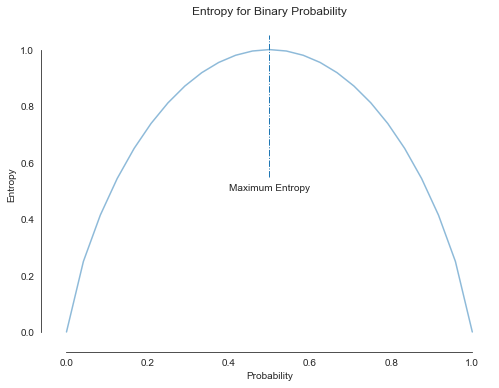

In [3]:
import math

tol = 1E-6

p = np.linspace(tol, 1 - tol, 25)

h = -p * np.log2(p) - (1 - p) * np.log2(1 - p)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(p, h, alpha=0.5)
ax.vlines(0.5, ymin=0.55, ymax=1.05, lw=1, linestyles='-.')
ax.text(0.5, 0.5, 'Maximum Entropy', horizontalalignment='center')

ax.set_title('Entropy for Binary Probability')
ax.set_xlabel('Probability')
ax.set_ylabel('Entropy')
sns.despine(offset=5, trim=True)

As the figure demonstrates, the entropy is a maximum ( =1 ) when the data are equally divided, and is minimal ( ≈0 ) when the data are approximately uniform. Thus, entropy provides a measure of the purity of a data set.

## Information Gain

While entropy is a useful measure of the distribution of instances among a set of classes in a data set, its computation and interpretation can become difficult in a feature-rich data set. Instead, we can calculate the relative entropy, or *information gain* for a set of features. In this case, we compute how the selection of one feature and value along which to split affects the probability of the features of interest being split into child nodes.